In [4]:
import pandas as pd

# Load the dataset
file_path = '../data/raw_analyst_ratings.csv'  
df = pd.read_csv(file_path)

# Display the first few rows to ensure it's loaded correctly
df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [5]:
# Descriptive Statistics Function
def descriptive_statistics(df, headline_col, publisher_col, date_col):
    # Headline length statistics
    df['headline_length'] = df[headline_col].apply(lambda x: len(x) if isinstance(x, str) else 0)
    headline_stats = df['headline_length'].describe()

    # Count articles per publisher
    articles_per_publisher = df[publisher_col].value_counts()

    # Analyze publication dates over time
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    trend_over_time = df[date_col].dt.date.value_counts().sort_index()

    return {
        'headline_stats': headline_stats,
        'articles_per_publisher': articles_per_publisher,
        'trend_over_time': trend_over_time
    }

# Call the function and display results
stats = descriptive_statistics(df, 'headline', 'publisher', 'date')
print(stats['headline_stats'])
print(stats['articles_per_publisher'])
print(stats['trend_over_time'])

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [ ]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Sentiment Analysis Function
def sentiment_analysis(df, text_col):
    sentiments = df[text_col].apply(lambda x: TextBlob(x).sentiment.polarity)
    sentiment_stats = sentiments.describe()
    return sentiment_stats

# Topic Modeling Function
def topic_modeling(df, text_col, num_topics=5):
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    doc_term_matrix = vectorizer.fit_transform(df[text_col].dropna())
    
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # Get the top words for each topic
    feature_names = vectorizer.get_feature_names_out()
    top_words = {}
    for index, topic in enumerate(lda.components_):
        top_words[f'Topic {index + 1}'] = [feature_names[i] for i in topic.argsort()[-10:]]
    
    return top_words

# Call the functions and display results
sentiment_stats = sentiment_analysis(df, 'headline')
print("Sentiment Stats:", sentiment_stats)

top_words = topic_modeling(df, 'headline', num_topics=5)
print("Top Words per Topic:", top_words)

In [8]:
def time_series_analysis(df, date_col):
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    publication_count = df[date_col].dt.date.value_counts().sort_index()
    return publication_count

# Call the function and display results
publication_count = time_series_analysis(df, 'date')
print(publication_count)

date
2011-04-27      1
2011-04-28      2
2011-04-29      2
2011-04-30      1
2011-05-01      1
             ... 
2020-06-07     25
2020-06-08    765
2020-06-09    804
2020-06-10    806
2020-06-11    544
Name: count, Length: 2528, dtype: int64


In [9]:
from urllib.parse import urlparse

# Publisher Analysis Function
def publisher_analysis(df, publisher_col):
    articles_per_publisher = df[publisher_col].value_counts()
    
    # Extract domains from email addresses
    def extract_domain(email):
        if isinstance(email, str) and "@" in email:
            return email.split('@')[1]
        return None
    
    df['domain'] = df[publisher_col].apply(extract_domain)
    domain_counts = df['domain'].value_counts(dropna=True)
    
    return articles_per_publisher, domain_counts

# Call the function and display results
publisher_counts, domain_counts = publisher_analysis(df, 'publisher')
print(publisher_counts)
print(domain_counts)

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


In [ ]:
# Descriptive Statistics
stats = descriptive_statistics(df, 'headline', 'publisher', 'date')
print("Headline Stats:\n", stats['headline_stats'])
print("Articles per Publisher:\n", stats['articles_per_publisher'])
print("Trend Over Time:\n", stats['trend_over_time'])

# Text Analysis (Sentiment and Topic Modeling)
sentiment_stats = sentiment_analysis(df, 'headline')
print("Sentiment Stats:\n", sentiment_stats)

top_words = topic_modeling(df, 'headline', num_topics=5)
print("Top Words per Topic:\n", top_words)

# Time Series Analysis
publication_count = time_series_analysis(df, 'date')
print("Publication Count Over Time:\n", publication_count)

# Publisher Analysis
publisher_counts, domain_counts = publisher_analysis(df, 'publisher')
print("Publisher Counts:\n", publisher_counts)
if not domain_counts.empty:
    print("Domain Counts:\n", domain_counts)


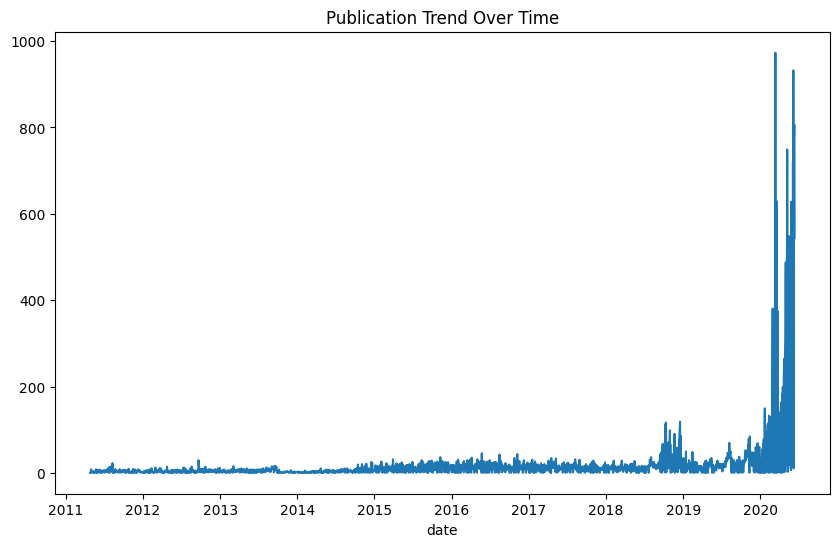

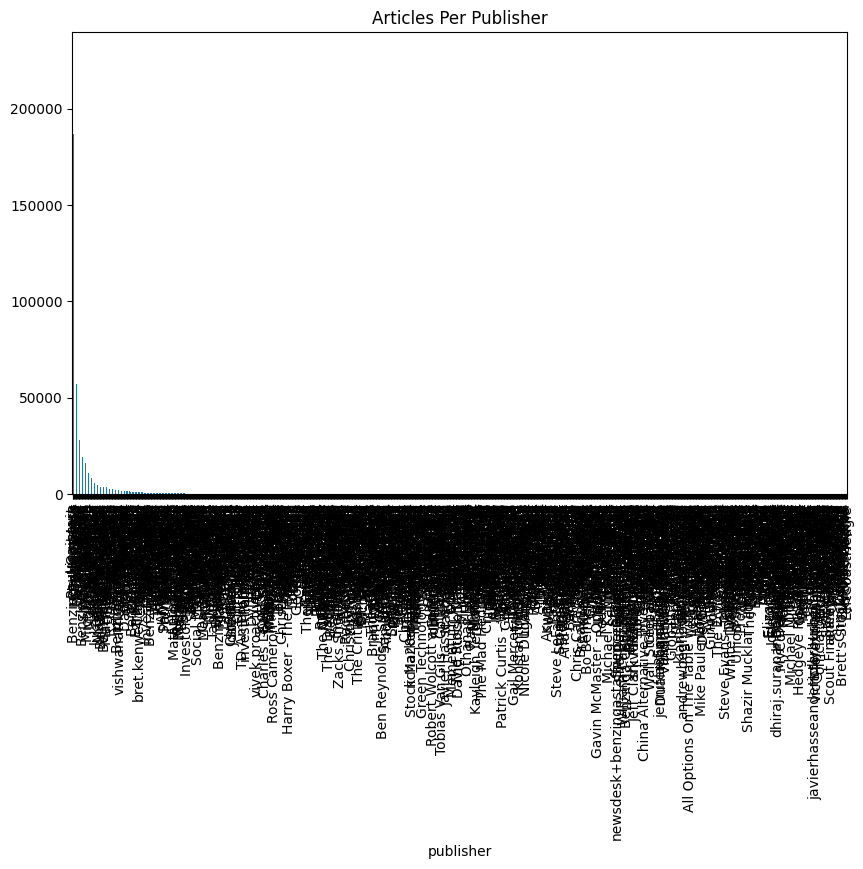

In [11]:
import matplotlib.pyplot as plt

# Plot the trend over time
stats['trend_over_time'].plot(kind='line', figsize=(10,6), title="Publication Trend Over Time")
plt.show()

# Plot publisher counts
stats['articles_per_publisher'].plot(kind='bar', figsize=(10,6), title="Articles Per Publisher")
plt.show()

# # Plot sentiment distribution
# sentiment_stats.hist(bins=50)
# plt.title("Sentiment Polarity Distribution")
# plt.show()